In [4]:
# Import most generic modules
import os
import sys
from datetime import datetime
import pandas as pd
from IPython.display import display, Markdown
import warnings

warnings.filterwarnings("ignore")
module_path = os.path.abspath(os.path.join("../.."))

import ipywidgets as widgets
from ipyflex import FlexLayout
from gamestonk_terminal import api as gst

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from gamestonk_terminal.stocks.due_diligence import business_insider_model, business_insider_view, finnhub_model, finnhub_view, marketwatch_model, finviz_model
from gamestonk_terminal.config_terminal import theme

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

from gamestonk_terminal.jupyter.reports import report_helper
import gamestonk_terminal.config_plot as cfp
from gamestonk_terminal.helper_funcs import (
    plot_autoscale,
)

warnings.filterwarnings("ignore")
module_path = os.path.abspath(os.path.join("../.."))

if module_path not in sys.path:
    sys.path.append(module_path)

## Set Terminal style to light mode

In [5]:
from gamestonk_terminal.helper_classes import TerminalStyle as _TerminalStyle

try:
    # Terminal UX section
    theme = _TerminalStyle("light", "light", "light",
    )
except Exception as e:
    pass

## Select Ticker

In [6]:
# Parameters that will be replaced when calling this notebook
ticker = "AMC"
ticker_data = gst.stocks.load(ticker)

report_name = (
    f"{datetime.now().strftime('%Y%m%d_%H%M%S')}_due_diligence_{ticker.upper()}"
)

Loading Daily AMC stock with starting period 2019-03-20 for analysis.

In [7]:
display(
    Markdown(
        f"# {ticker.upper()} - Due Dilligence - {datetime.now().strftime('%Y/%m/%d %H:%M:%S')}"
    )
)

# AMC - Due Dilligence - 2022/03/24 10:31:24

## Dataframe Outputs

In [8]:
df_year_estimates, df_quarter_earnings, df_quarter_revenues = business_insider_model.get_estimates(ticker)
display_year = sorted(df_year_estimates.columns.tolist())[:3]
df_year_estimates = df_year_estimates[display_year]

### 1. Yearly Estimates

In [9]:
df_year_estimates.head()

,2022,2023,2024
YEARLY ESTIMATES,,,
Revenue,"4,603","5,269","5,381"
Dividend,0.02,0.03,0.00
Dividend Yield (in %),0.12 %,0.16 %,-
EPS,-0.80,-0.40,-0.29
P/E Ratio,-22.99,-46.19,-62.62


### 2. Quarterly Earnings

In [10]:
df_quarter_earnings.head()

,Previous Quarter,Current Quarter,Next Quarter,Current Year,Next Year
QUARTER EARNINGS ESTIMATES,,,,,
Date,ending 12/31/21,ending 03/31/22,ending 06/30/22,ending 12/31/22,ending 12/31/23
No. of Analysts,8,7,7,7,7
Average Estimate,-0.229 USD,-0.471 USD,-0.138 USD,-0.801 USD,-0.399 USD
Year Ago,-6.210 USD,-1.420 USD,-0.710 USD,-2.500 USD,-0.801 USD
Publish Date,3/1/2022,5/9/2022,8/11/2022,-,-


### 3. Quarterly Revenues

In [11]:
df_quarter_revenues.head()

,Previous Quarter,Current Quarter,Next Quarter,Current Year,Next Year
QUARTER REVENUES ESTIMATES,,,,,
Date,ending 12/31/21,ending 03/31/22,ending 06/30/22,ending 12/31/22,ending 12/31/23
No. of Analysts,7,7,7,8,7
Average Estimate,"1,092 USD",779 USD,"1,248 USD","4,603 USD","5,269 USD"
Year Ago,163 USD,148 USD,445 USD,"2,515 USD","4,603 USD"
Publish Date,3/1/2022,5/9/2022,8/11/2022,-,-


### 4. SEC Filings

In [12]:
df_sec_filings = marketwatch_model.get_sec_filings(ticker)[["Type", "Category", "Link"]].head(5)
df_sec_filings

,Type,Category,Link
Filing Date,,,
03/01/2022,10-K,Annual Reports,https://www.marketwatch.com/investing/stock/amc/financials/secfilings?docid=15621595
03/01/2022,8-K,Special Events,https://www.marketwatch.com/investing/stock/amc/financials/secfilings?docid=15620562
03/01/2022,8-K,Special Events,https://www.marketwatch.com/investing/stock/amc/financials/secfilings?docid=15616454
02/14/2022,8-K,Special Events,https://www.marketwatch.com/investing/stock/amc/financials/secfilings?docid=15569198
02/09/2022,SC 13G,Institutional Ownership,https://www.marketwatch.com/investing/stock/amc/financials/secfilings?docid=15544603


### 5. Analyst Ratings

In [13]:
df_analyst = finviz_model.get_analyst_data(ticker)
df_analyst["target_to"] = df_analyst["target_to"].combine_first(df_analyst["target"])
df_analyst = df_analyst[["category","analyst", "rating", "target_to"]].rename(columns = {"category": "Category", "analyst": "Analyst", "rating": "Rating", "target_to": "Price Target"})
df_analyst

,Category,Analyst,Rating,Price Target
date,,,,
2021-11-04,Downgrade,Wedbush,Neutral -> Underperform,7.5
2021-09-01,Downgrade,Macquarie,Neutral -> Underperform,NaN
2021-05-26,Downgrade,B. Riley Securities,Buy -> Neutral,16.0
2021-04-05,Upgrade,B. Riley Securities,Neutral -> Buy,13.0
2021-02-01,Downgrade,MKM Partners,Neutral -> Sell,1.0


## Plots

### 1. Price Target

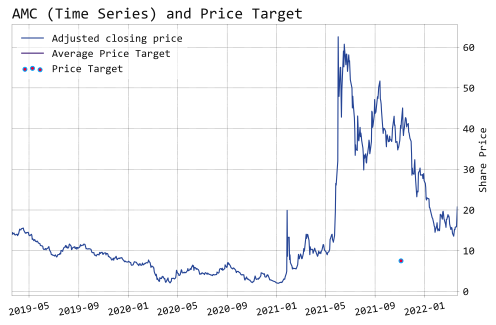

In [14]:
fig_pt, ax_pt = plt.subplots(figsize=plot_autoscale(), dpi=cfp.PLOT_DPI)
gst.stocks.dd.pt(ticker=ticker, start="10/25/2021", interval="1440min", stock=ticker_data, num=10, raw=False, external_axes=[ax_pt])
plt.show(fig_pt)

### 2. Ratings over time

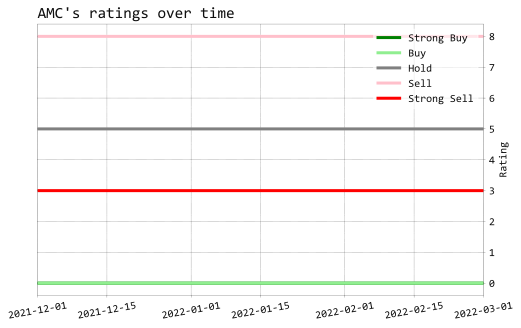

In [15]:
fig_rot, ax_rot = plt.subplots(figsize=plot_autoscale(), dpi=cfp.PLOT_DPI)

gst.stocks.dd.rot(ticker=ticker, external_axes=[ax_rot], num=10, raw=False, export ="")
plt.show(fig_rot)